In [ ]:



# Filtrad los datos para quedarnos solo con los datos de USA.
# ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
# En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.
# Filtrad los datos para Spain:
# ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
# En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [12]:
# Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming 
# trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas 
# columnas de nuestro csv.

df=pd.read_csv('./datos/attacks_modificado.csv')
df.head()

,case-number,unnamed:-0,year,type,country,area,location,activity,name,sex-,age,time,species-,href,case-number.2
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04


In [ ]:

# Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.
# 📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, 
# también tendremos que usar métodos que hemos aprendido en lecciones anteriores de 
# Pandas como por ejemplo value_counts(), isnull, describe, etc.

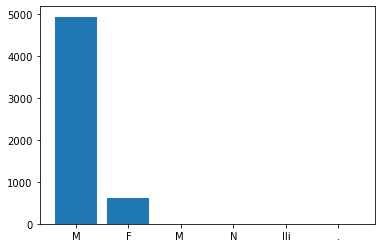

In [17]:
# Tendréis que realizar gráficas para contestar a las siguientes preguntas:
# ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?
serie_cuentas= df['sex-'].value_counts()
x= serie_cuentas.index
y= serie_cuentas.values

plt.figure()

plt.bar(x,y)

plt.show()

In [ ]:
# ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. 
# Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.

In [19]:
shape_df= df.shape
valores_nulos=df.isna().sum()
porcentajes=valores_nulos/shape_df[0]*100
porcentajes


case-number       0.016356
unnamed:-0        0.000000
year              0.000000
type              0.065424
country           0.654236
area              6.673209
location          7.981681
activity          8.357867
name              3.271181
sex-              8.995747
age              43.604841
time             52.011776
species-         44.242722
href              0.000000
case-number.2     0.000000
dtype: float64

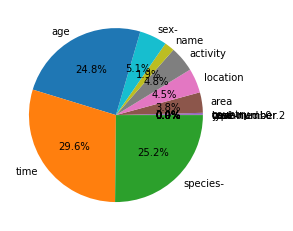

In [35]:
variables=['case-number', 'unnamed:-0', 'year', 'type', 'country', 'area',
       'location', 'activity', 'name', 'sex-', 'age', 'time', 'species-',
       'href', 'case-number.2']


data=porcentajes
plt.figure()

plt.pie(data.values, labels=variables, autopct='%1.1f%%')
plt.show()

In [ ]:
# ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [68]:
describe= df.describe(include='object')
describe

,case-number,type,country,area,location,activity,name,sex-,age,time,species-,href,case-number.2
count,6113,6110,6074,5706,5626,5603,5914,5564,3448,2934,3409,6114,6114
unique,6113,8,201,791,4020,1484,5118,6,156,366,1529,6099,6114
top,2018.06.25,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,17,Afternoon,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25
freq,1,4438,2200,1025,162,966,511,4939,154,183,161,4,1


In [47]:
nombres_columna= df.columns
valores_unicos = {}
for i in nombres_columna:

    valores_unicos.update({i:df[i].unique()})

valores_unicos

{'case-number': array(['2018.06.25', '2018.06.18', '2018.06.09', ..., '1803.03.00',
        '1802.04.13.R', '1801.12.18.R'], dtype=object),
 'unnamed:-0': array([   0,    1,    2, ..., 6129, 6130, 6131]),
 'year': array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
        2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
        2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
        1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
        1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
        1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
        1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
        1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
        1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
        1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
        1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
      

In [64]:
valor.unique()

AttributeError: 'dict_values' object has no attribute 'unique'

In [55]:
 valores_unicos.keys()

dict_keys(['case-number', 'unnamed:-0', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex-', 'age', 'time', 'species-', 'href', 'case-number.2'])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (15,) + inhomogeneous part.

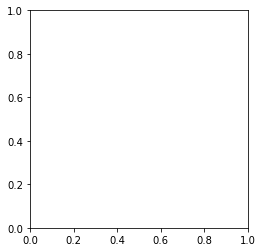

In [57]:
x=valores_unicos.keys()
y= valores_unicos.values()

plt.figure()

plt.pie(y, labels=x, autopct='%1.1f%%')
plt.show()